In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import pyhrv
import pyhrv.time_domain as td
import pyhrv.frequency_domain as fd


import statistics



In [37]:
BP_HB = pd.read_csv('Hemodynamic-beats.txt',sep=';',skiprows=7)
BP_HB

,Time (s),Systolic Pressure (mmHg),Diastolic Pressure (mmHg),Mean Pressure (mmHg),Heart rate (bpm),Stroke Volume (ml),Left Ventricular Ejection Time (ms),Pulse Interval (ms),Maximum Slope (mmHg/s),Cardiac Output (l/min),Total Peripheral Resistance Medical Unit (mmHg.min/l),Total Peripheral Resistance CGS (dyn.s/cm5),Markers,Unnamed: 13
0,5.255,0,0,0,54,0.0,0,1115,0,0.0,0.000,0,NaN,NaN
1,6.370,0,0,0,53,0.0,0,1135,0,0.0,0.000,0,NaN,NaN
2,7.505,0,0,0,54,0.0,0,1105,0,0.0,0.000,0,NaN,NaN
3,8.610,0,0,0,56,0.0,0,1070,0,0.0,0.000,0,NaN,NaN
4,9.680,0,0,0,54,0.0,0,1120,0,0.0,0.000,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,17:22.436,106,61,77,68,82.5,360,885,942,5.6,0.829,1105,stop CB,NaN
967,17:23.323,109,64,81,71,84.8,365,850,942,6.0,0.812,1083,NaN,NaN
968,17:24.171,112,67,84,66,85.5,360,910,963,5.6,0.889,1185,NaN,NaN
969,17:25.083,115,68,85,66,87.3,355,915,1013,5.7,0.894,1192,NaN,NaN


In [161]:
nni = BP_HB['Pulse Interval (ms)']
nni_HR = BP_HB['Heart rate (bpm)']

# Compute parameters
NNI = td.nni_parameters(nni)
NNI_HR = td.nni_parameters(nni_HR)

STD = td.sdnn(nni)
STD_HR = td.sdnn(nni_HR)

RMSSD = td.rmssd(nni)
NN50 = td.nn50(nni)



In [165]:
# Create a new DataFrame for the report

report_df = pd.DataFrame({'Variable':['Mean RR', 'STD RR', 'Mean HR', 'STD HR','RMSSD', 'NN50', 'pNN50'],
                                'Unit':['(ms)', '(ms)', '(1/min)', '(1/min)', '(ms)','(count)', '(%)'],                                
                                'Value':[NNI['nni_mean'], STD['sdnn'], NNI_HR['nni_mean'], STD_HR['sdnn'],RMSSD['rmssd'], NN50['nn50'], NN50['pnn50']]
                                })                    
                                
        
report_df               


,Variable,Unit,Value
0,Mean RR,(ms),1027.229660
1,STD RR,(ms),126.454620
2,Mean HR,(1/min),59.081359
3,STD HR,(1/min),7.402185
4,RMSSD,(ms),154.536637
5,NN50,(count),359.000000
6,pNN50,(%),37.010309


A report from HRV analysis with Kubios HRV software. 

Time domain parameters: 
MeanRR (mean beat-to-beat interval)
SDNN (Standard deviation of normal to normal R-R intervals)
MeanHR (Mean heart rate), STDHR (Standard deviation of heart frequency)
RMSSD (The square root of the mean squared difference between adjacent N-N intervals)
NN50 (number of differences between adjacent RR intervals)
pNN50 (percentage of differences between adjacent RR intervals)
TINN (Triangular interpolation of RR intervals); 

Frequency domain parameters: 
VLF (Very low frequency)
LF (Low frequency)
HF (High frequency)

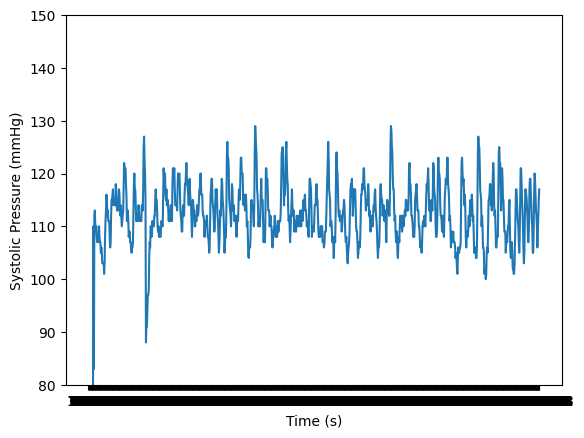

In [23]:
# Plotting the graph
plt.axes(ylim=[80,150],xlabel='Time (s)',ylabel='Systolic Pressure (mmHg)')
plt.plot(BP_HB['Time (s)'], BP_HB['Systolic Pressure (mmHg)'])


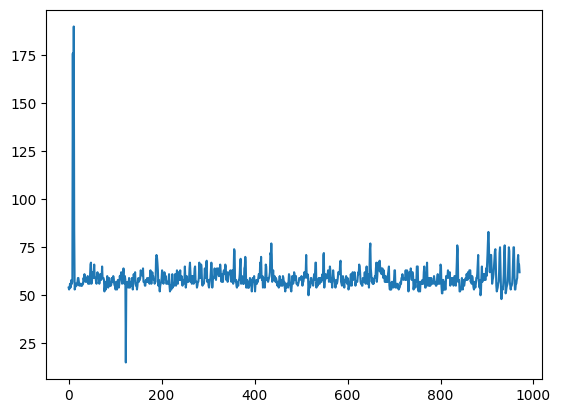

In [22]:
plt.plot(BP_HB['Heart rate (bpm)'])

In [24]:
def calculate_hrv(rr_intervals):
    # Calculate the mean RR interval
    mean_rr = statistics.mean(rr_intervals)

    # Calculate the standard deviation of RR intervals
    sdnn = statistics.stdev(rr_intervals)

    # Calculate the root mean square of successive RR interval differences (RMSSD)
    rr_diffs = [abs(rr_intervals[i] - rr_intervals[i-1]) for i in range(1, len(rr_intervals))]
    rmssd = statistics.sqrt(statistics.mean([diff**2 for diff in rr_diffs]))

    return mean_rr, sdnn, rmssd

    

In [26]:
# Calculate time domain HRV metrics
rr_intervals = BP_HB['Heart rate (bpm)']
mean_rr, sdnn, rmssd = calculate_hrv(rr_intervals)

In [27]:
print("Mean RR Interval:", mean_rr)
print("SDNN:", sdnn)
print("RMSSD:", rmssd)

Mean RR Interval: 59.081359423274975
SDNN: 7.402185007977794
RMSSD: 8.0


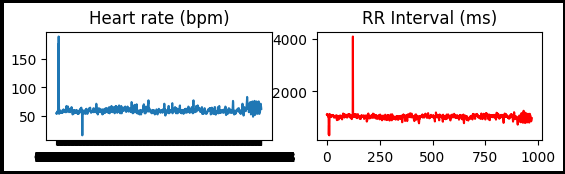

In [28]:
fig = plt.figure(edgecolor=(0,0,0),linewidth=5)
ax1 = fig.add_subplot(321,title='Heart rate (bpm)')
ax1.plot(BP_HB['Time (s)'],BP_HB['Heart rate (bpm)'])
ax2 = fig.add_subplot(322,title='RR Interval (ms)')
ax2.plot(BP_HB['Pulse Interval (ms)'],'r')
plt.show()

In [29]:
fs = 1000  # Sample rate (Hz)
fft = np.fft.fft(rr_intervals)
magnitude = np.abs(fft)
frequency = np.fft.fftfreq(len(rr_intervals), 1/fs)

0      54
1      53
2      54
3      56
4      54
       ..
966    68
967    71
968    66
969    66
970    62
Name: Heart rate (bpm), Length: 971, dtype: int64


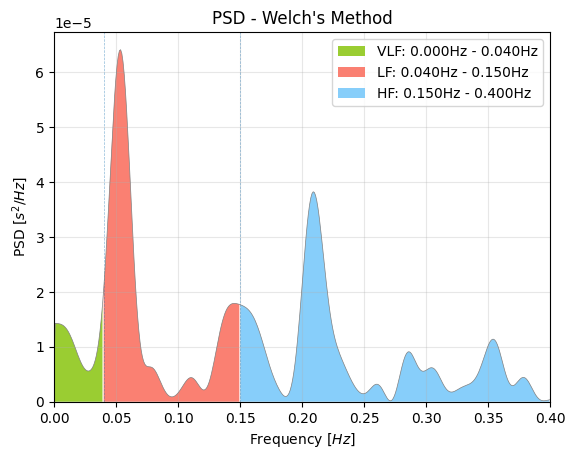

(0.0390625, 0.0537109375, 0.208984375)
<class 'tuple'>


In [30]:
print(rr_intervals)
result = fd.welch_psd(rr_intervals,show_param=False)
print(result['fft_peak'])
print(type(result['fft_peak']))